In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from icecream import ic
import numpy as np

1. Import data les données du csv

In [21]:
df = pd.read_csv('carData.csv')

2. Exploration des données

In [22]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [23]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [25]:
df['Selling_Price'] = df['Selling_Price'] * 1000
df['Present_Price'] = df['Present_Price'] * 1000
df['Seller_Type'] = df['Seller_Type'].replace({'Dealer': 0, 'Individual': 1})
df['Fuel_Type'] = df['Fuel_Type'].replace({'Petrol': 0, 'Diesel': 1, 'CNG': 2})
df['Transmission'] = df['Transmission'].replace({'Manual': 0, 'Automatic': 1})

2. Variable Continue 

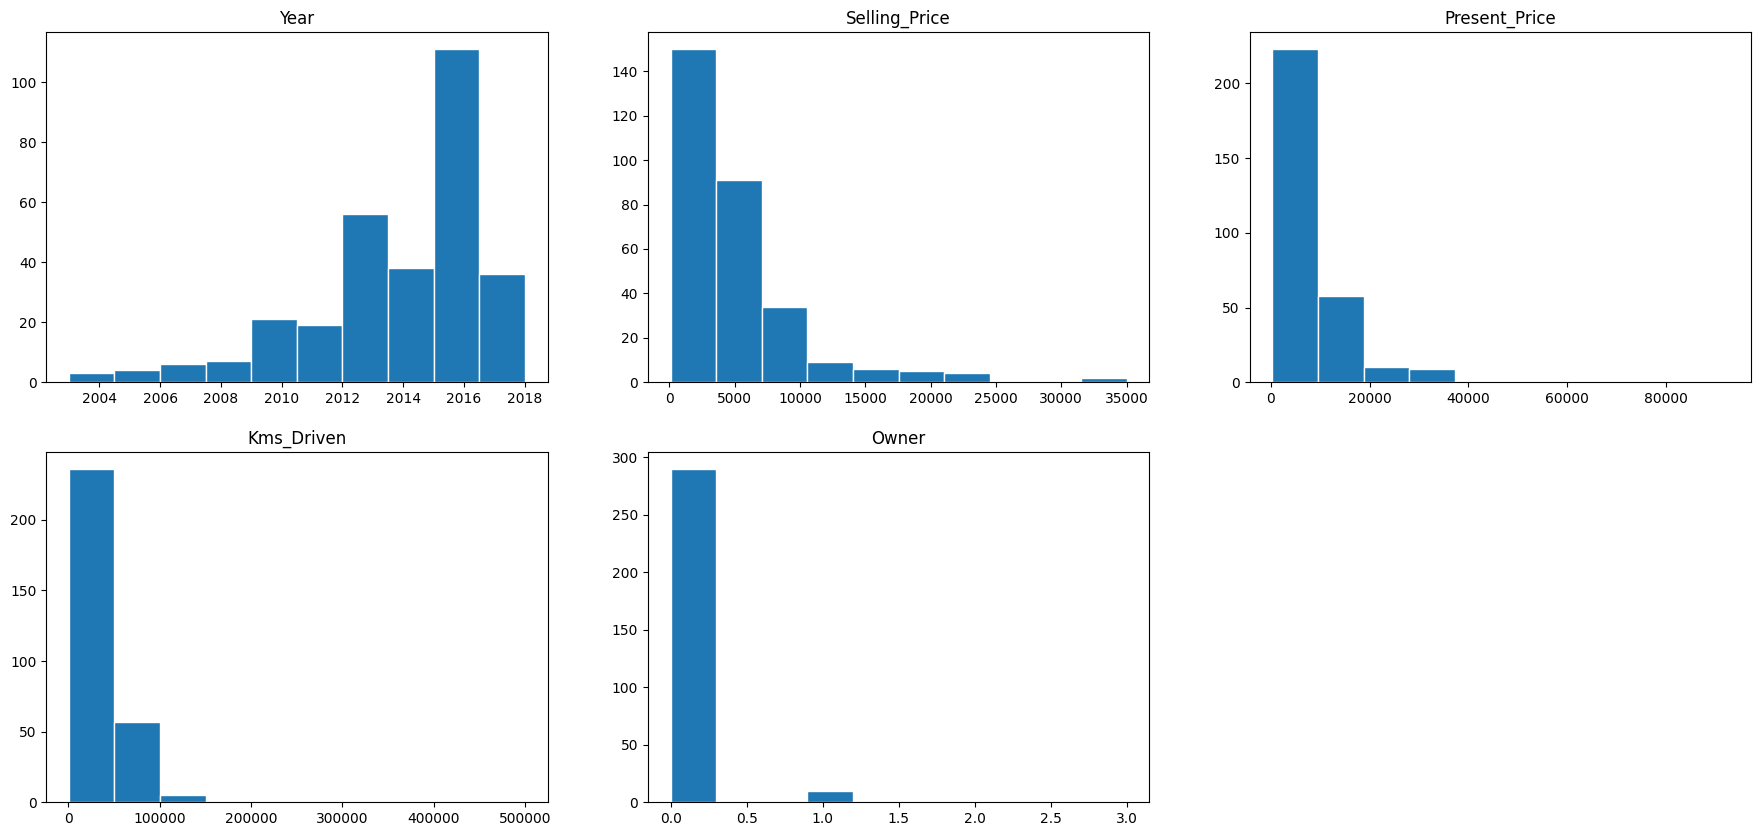

In [26]:
plt.figure(figsize=(22, 10))

cols = ['Year', 'Selling_Price','Present_Price','Kms_Driven','Owner']
for i, col in enumerate(cols, 1):
    plt.subplot(2, 3, i)  
    plt.hist(df[col], bins=10, edgecolor='white')
    plt.title(col)
plt.show()

2. Variable Discréte

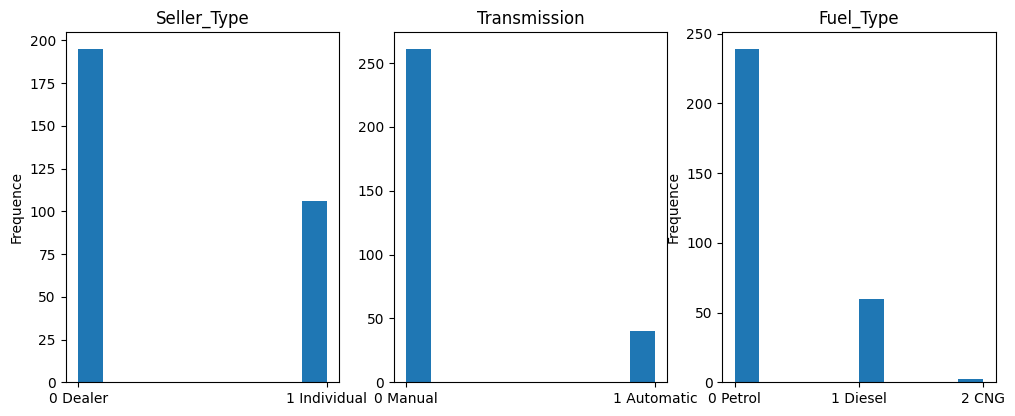

In [27]:
plt.figure(figsize=(12, 10))
plt.subplot(2,3,1)
plt.hist(df['Seller_Type'])
plt.xticks([0, 1], ['0 Dealer', '1 Individual'])
plt.title('Seller_Type')
plt.ylabel('Frequence')
plt.subplot(2,3,2)
plt.hist(df['Transmission'])
plt.xticks([0, 1], ['0 Manual', '1 Automatic'])
plt.title('Transmission')
plt.subplot(2,3,3)
plt.hist(df['Fuel_Type'])
plt.xticks([0, 1, 2], ['0 Petrol', '1 Diesel','2 CNG'])
plt.title('Fuel_Type')
plt.ylabel('Frequence')
plt.show()

3


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [29]:

# dataframe loading
df = pd.read_csv('data/carData.csv')

df['Selling_Price'] = df['Selling_Price'] * 1000
df['Present_Price'] = df['Present_Price'] * 1000


Creating a catplot allows us to see the distribution of the data, with the kind="box" parameter, we have bloxplot, which gives us the mean, the median and the quartiles. We can use it to have more information about our dataset.

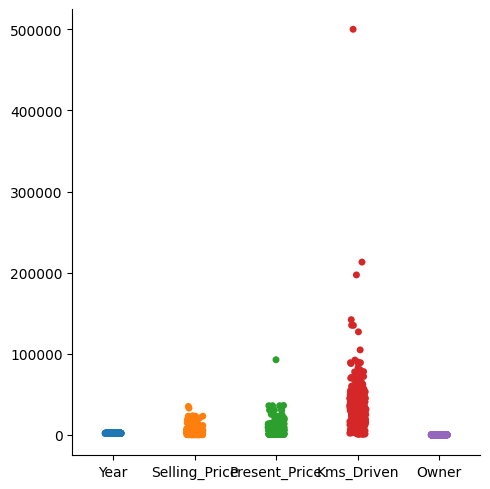

In [30]:
sns.catplot(data=df)
# plt.yscale('log')  #logarythme
plt.show()


4. Data Correlation de Pearson


In [31]:
df['Year'].corr(df['Selling_Price'])


0.23614098016042745

Une corrélation positive entre Year et Selling_Price signifie que les voitures récentes se vendent plus cher.
La relation entre l'âge et le prix n'est pas strictement linéaire.

La corrélation est trop faible pour que l'âge soit un bon prédicteur du prix.

Il semble y avoir une dispersion et des valeurs aberrantes.


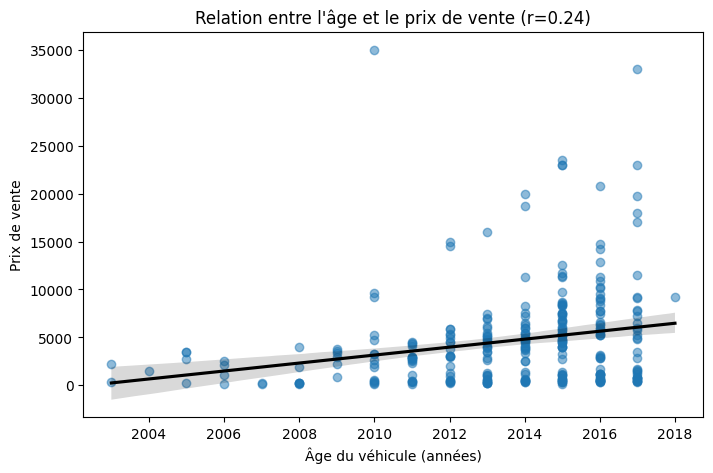

In [32]:
plt.figure(figsize=(8,5))
sns.regplot(x=df['Year'], y=df['Selling_Price'], scatter_kws={'alpha':0.5}, line_kws={"color": "black"})
plt.xlabel("Âge du véhicule (années)")
plt.ylabel("Prix de vente")
plt.title(f"Relation entre l'âge et le prix de vente (r={df['Year'].corr(df['Selling_Price']):.2f})")
plt.show()


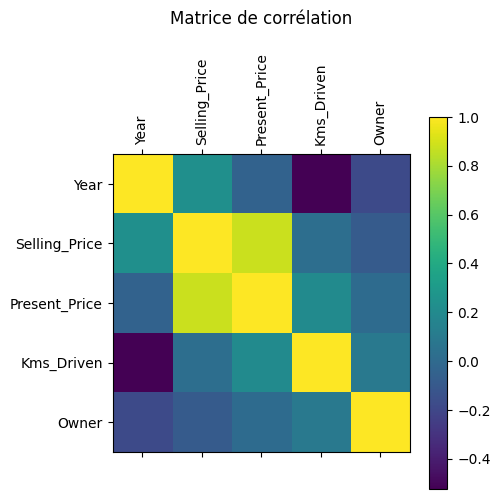

In [33]:
corr = df.corr(numeric_only=True)

plt.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.title("Matrice de corrélation", pad=20)
plt.show()



Notre jeu de données n'était pas adapté pour régression linéaire car certaine colonnes tels que Transmission, Seller_Typer et Fuel_Type était des types strings. Nous les avons donc changé en interger, où un numéro correspondont a une type de données ex: Automatic = 1 pour Transmission. Notre jeu de données est maintenant adapté pour la régression linéaire


In [34]:
correlation = df.select_dtypes(include=['number']).corr ()
correlation[((correlation <= -0.3) | (correlation >= 0.3))]

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,NaN,NaN,-0.524342,NaN
Selling_Price,NaN,1.000000,0.878983,NaN,NaN
Present_Price,NaN,0.878983,1.000000,NaN,NaN
Kms_Driven,-0.524342,NaN,NaN,1.000000,NaN
Owner,NaN,NaN,NaN,NaN,1.0


5. Linear Regression

In [35]:

#data loading
df = pd.read_csv('data/carData.csv')
filtered_df = df[(df['Year'] > (df['Year'].max() - 7)) & (df['Kms_Driven'] <= 100000) & (df['Transmission'] == 'Manual')]


Year = df['Year'].values.reshape(-1,1)
Selling_Price = df['Selling_Price'] * 1000
Transmission = df['Transmission'].map({'Manual': 0, 'Automatic': 1})
Kms_Driven = df['Kms_Driven']
Present_Price = df['Present_Price'] * 1000
Fuel_Type = df['Fuel_Type'].map({'Petrol' :0, 'Diesel' :1, 'CNG' : 2})
Seller_Type = df['Seller_Type'].map({'Dealer':0 , 'Individual' : 1})
Owner = df['Owner']




In [36]:

#split dataset on 80% data for train and 20% data for test 

X_train, X_test, y_train, y_test = train_test_split(np.column_stack((Year, Transmission, Kms_Driven, Present_Price, Fuel_Type, Seller_Type)), Selling_Price, test_size=0.2, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)



(240, 6)
(240,)
(61, 6)
(61,)


In [37]:
#model creation
model = LinearRegression()

model.fit(X_train,y_train)

score = model.score(X_test,y_test)
print('score '+str(score))

prediction = model.predict(X_test)
print(f' prediction {prediction} ' )



score 0.9174279681949838
 prediction [ 7197.2242917   -525.61983401  4318.513199    8710.53116161
 14150.76596397  4948.64192693  3513.76580622  1415.46348703
  5322.60934292  4639.20173572  2227.40175825  1591.67644213
  5157.12441816  7596.34035517  8309.04281724 14159.05506558
  7378.25920053  4285.97948476  -562.48338029  2370.41079787
  4937.92803848  4843.3445734   6430.75072555  8161.36242182
 -2079.72341247  1925.43064959  -927.72010153   758.53504943
   -87.02797356  7061.03211469  4051.69015327  7082.1343259
   659.11491949  7612.16288651  3492.83398149  1784.35489604
  5640.62179117  6644.57432989 -1889.91883098  8775.96955093
  8934.44909426 19805.16592918  4431.20129552  4876.03894446
  6301.14191718  9566.77619686    46.87885432  1656.35470102
  5161.26775578  7010.7581079   8100.2379666   4242.44917352
  4911.00127305 20178.23737571  1732.43776052  1268.20485798
   214.77941757  1961.19660792  3409.04210588  1773.1095891
  3440.36175188] 


In [38]:

def generate_combinations(input_list):
    import itertools
    all_combinations = []

    # generate all generation with size 2 , then 3 ect...
    for i in range(2, len(input_list) + 1):
        combinations = list(itertools.combinations(input_list, i))
        all_combinations.extend(combinations)
    
    return all_combinations

columns = [Year,Transmission,Kms_Driven,Present_Price,Fuel_Type,Seller_Type,Owner]
strColumns = ['Year','Transmission','Kms_Driven','Present_Price','Fuel_Type','Seller_Type','Owner']
target = Selling_Price

def FindBestFeatureCombination(allFeatures ,y,strFeatures):
    best_score = float(0)
    best_combination = []
    allCombination= generate_combinations(allFeatures)
    strCombination= generate_combinations(strFeatures)
    strIndex = 0
    for combination in allCombination:

        # divide dataset between test(80%) and train(20%)
        X_train, X_test, y_train, y_test = train_test_split(np.column_stack((combination)), y, test_size=0.2, random_state=0)
       
        model = LinearRegression()
        model.fit(X_train, y_train)

        score = model.score(X_test, y_test)
        # if the score is better , we keep it 
        if score > best_score:
            best_score = score
            best_combination = strCombination[strIndex]
        strIndex +=1

    # print the best combination with the best score 
    print(f"Meilleure combinaison : {best_combination} avec un score R² de {best_score}")

FindBestFeatureCombination(columns,target,strColumns)
# generate_combinations(columns)




Meilleure combinaison : ('Year', 'Transmission', 'Kms_Driven', 'Present_Price', 'Fuel_Type', 'Seller_Type') avec un score R² de 0.9174279681949838


6

(301, 1) (301,)


Text(0.5, 0, 'KMS driven')

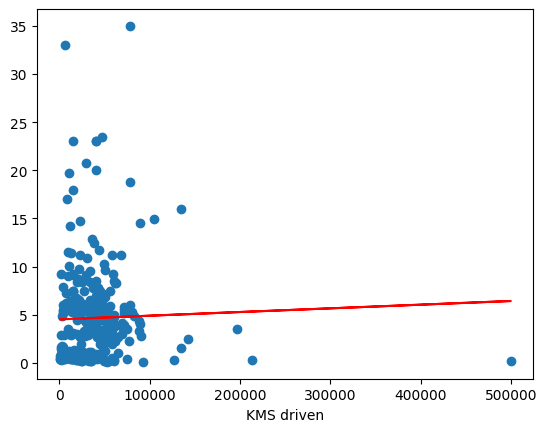

In [39]:
X = df['Kms_Driven'].values.reshape(-1,1)
y = df['Selling_Price'].values
print(X.shape, y.shape)

# print(X[:,0].reshape(-1,1).shape)

model = LinearRegression()
model.fit(X,y)
model.score(X,y)

predict2 = model.predict(X)

plt.scatter(X, y)
plt.plot(X, predict2, color='r')
plt.xlabel("KMS driven")

In [40]:
X = df['Transmission'].values.reshape(-1,1)
y = df['Selling_Price'].values
print(X.shape, y.shape)

# print(X[:,0].reshape(-1,1).shape)

model = LinearRegression()
model.fit(X,y)
model.score(X,y)

predict2 = model.predict(X)

plt.scatter(X, y)
plt.plot(X, predict2, color='r')
plt.xlabel("KMS driven")

(301, 1) (301,)


ValueError: could not convert string to float: 'Manual'

Cette régression n'est pas pertinente car ses données sont composé d'uniquement de 1 et de 0. Ces valeurs ne sont pas adapté pour une regression linéaire, ce n'est pas corrélés et ça ne veut rien dire.

In [ ]:
X = df[['Kms_Driven','Transmission']].values
y = df['Selling_Price'].values
# print(X.shape, y.shape)

model = LinearRegression()
model.fit(X,y)
print("Score du R2: ", model.score(X,y))

predict2 = model.predict(X)

print("\n Min : ",predict2.min(), "\n Max : ", predict2.max(), "\n Moyenne : ", predict2.mean())

Score du R2:  0.13573660748173266

 Min :  3201.5947344564993 
 Max :  9635.053228768149 
 Moyenne :  4661.295681063124


7.

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((240, 2), (61, 2), (240,), (61,))

In [ ]:
multi_model = LinearRegression()
multi_model.fit(X_train, y_train)
multi_model.score(X_train, y_train)
multi_predictions = multi_model.predict(X_test)

In [ ]:
r2 = r2_score(y_test, multi_predictions)
mae = mean_absolute_error(y_test, multi_predictions)
mse = mean_squared_error(y_test, multi_predictions)
rmse = np.sqrt(mse)
ic(r2, mae, mse, rmse)

ic| r2: 0.26029554874590155
    mae: 3315.713630156559


    mse: 18697745.06220164
    rmse: 4324.0889285723115


(0.26029554874590155, 3315.713630156559, 18697745.06220164, 4324.0889285723115)

8.

In [ ]:
def make_linear_regression(X, y): 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    multi_model = LinearRegression()
    multi_model.fit(X_train, y_train)
    multi_model.score(X_train, y_train)
    multi_predictions = multi_model.predict(X_test)
    r2 = r2_score(y_test, multi_predictions)
    mae = mean_absolute_error(y_test, multi_predictions)
    mse = mean_squared_error(y_test, multi_predictions)
    rmse = np.sqrt(mse)
    ic(r2, mae, mse, rmse)
    return multi_predictions, y_test

In [ ]:
X = df[['Present_Price', 'Fuel_Type', 'Year']].values
make_linear_regression(X, df['Selling_Price'])

ic| r2: 0.8970784918883657
    mae: 1160.7830991680203
    mse: 2601579.748271108
    rmse: 1612.9413344170669

(array([ 7287.24587435,  -209.92691461,  3949.69754612,  8792.951295  ,
        13131.89344888,  4539.46546341,  3082.09392713,  1967.24718969,
         3543.72550974,  4320.74516226,  1581.13429665,  2157.0787966 ,
         4872.96071135,  5961.91257944,  8408.54229099, 13154.36456308,
         5740.15037715,  3991.11972184,  -103.62121473,  3031.59412426,
         3199.44874561,  4411.32912874,  4782.37674487,  8160.50336534,
        -1630.88966776,  2566.50668732,  -228.43549628,  1352.4603857 ,
          329.53562684,  5612.47607194,  3740.43672615,  7062.90380038,
         1252.79879207,  7506.84215814,  3220.59782479,  2418.09725611,
         5360.48716332,  6551.64839754, -1630.88966776,  9008.67777127,
         8876.20959962, 19430.43299098,  3949.69754612,  4628.34554085,
         6189.67840856,  9742.10932958,   596.58981237,  2261.48618041,
         5019.66625352,  6912.32845069,  6496.89693314,  3808.61377678,
         4782.37674487, 19892.0645736 ,  2418.09725611,  1942.22

Pour analyser les variables les plus impactantes sur la prédiction, il faut sélectionner les variables qui nous donnent les meilleurs indicateurs. Après avoir tester plusieurs combinaisons, nous avons conclu que la meilleure était, ('Year', 'Transmission', 'Kms_Driven', 'Present_Price', 'Fuel_Type', 'Seller_Type'). Notamment par rapport au R2 qui est un des plus pertinent pour les problèmes de régressions Linéaires.

9.

In [ ]:
df_filtered = df[
    (df['Year'] > df['Year'].max() - 7) &
    (df['Kms_Driven'] <= 100000) &
    (df['Transmission'] == 0)
]

df_filtered.shape

(0, 9)

In [ ]:
X_train = df[['Year', 'Kms_Driven', 'Transmission', 'Fuel_Type', 'Present_Price', 'Seller_Type', 'Owner']]
X_test = df_filtered[['Year', 'Kms_Driven', 'Transmission', 'Fuel_Type', 'Present_Price', 'Seller_Type', 'Owner']]
y_test = df_filtered['Selling_Price']
y_train = df['Selling_Price']

ic(X_train.shape, X_test.shape, y_test.shape, y_train.shape)

ic| X_train.shape: (301, 7

)
    X_test.shape: (0, 7)
    y_test.shape: (0,)
    y_train.shape: (301,)


((301, 7), (0, 7), (0,), (301,))

In [43]:
last_model = LinearRegression()
last_model.fit(X_train, y_train)
last_model.score(X_train, y_train)
last_predictions = last_model.predict(X_test)
last_predictions.mean()

4919.712209931269

D'apres l'algorithme de regression linéaire , pour un véhicule d'occasion ayant moins de 7 ans, pas plus de 100 000 km, avec une boite manuelle, Martin devrait trouver son bonheur autour des 4919 €